In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
filename = 'claims_data.csv'
df = pd.read_csv(filename)
target_col = "loss"

In [23]:
df.sample(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
56286,176421,A,A,A,B,B,A,A,A,A,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.295474,11746.54
74350,232420,B,A,A,A,B,A,A,A,A,...,0.217667,0.273770,0.33906,0.27393,0.37493,0.321076,0.314945,0.516660,0.495619,1392.24
167859,523494,A,B,A,A,A,B,A,A,B,...,0.368560,0.347037,0.51256,0.41675,0.39068,0.275431,0.270746,0.256038,0.346129,1263.14
34959,109564,B,B,A,B,A,A,A,A,B,...,0.206854,0.277613,0.33906,0.27393,0.37493,0.251234,0.247316,0.516660,0.694653,4932.69
79057,247382,A,B,A,A,A,A,A,A,B,...,0.441525,0.437192,0.31796,0.32128,0.44467,0.377724,0.369858,0.605077,0.281969,7502.29
65643,205581,A,A,A,A,A,B,A,A,A,...,0.373500,0.377003,0.36083,0.44352,0.45017,0.338312,0.366307,0.339244,0.283139,3202.35
171666,535674,A,A,A,B,A,A,A,B,A,...,0.680324,0.835049,0.25010,0.61751,0.77634,0.603774,0.590961,0.372852,0.395691,1348.41
39497,123829,A,B,A,B,A,A,A,A,B,...,0.399144,0.328060,0.60087,0.43524,0.45567,0.352419,0.345316,0.369740,0.709693,1403.50
135340,422251,A,A,A,B,A,B,A,A,A,...,0.720029,0.599132,0.35533,0.44145,0.78770,0.644013,0.630853,0.746494,0.602573,889.92
115782,361817,B,B,A,A,B,A,A,A,B,...,0.408772,0.357827,0.36083,0.46853,0.52221,0.453334,0.443374,0.321548,0.689039,2084.10


In [24]:
#Selecting 70-80
cols_70_80 = [col for col in df.columns if col.lower().startswith("cat") and 
              int(col.lower().replace("cat", "")) in range(70, 81)]

df_sub = df[cols_70_80 + [target_col]].copy()

In [25]:
df_sub.sample(5)

,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,loss
53865,A,A,A,A,A,A,A,D,B,B,D,3692.70
42203,A,A,B,B,A,A,A,D,B,B,D,615.66
141225,A,A,A,A,A,A,A,D,B,B,D,2067.17
157444,A,A,B,A,A,A,A,D,B,D,B,9807.03
103151,A,A,B,A,A,B,A,D,B,B,D,5282.58


In [26]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat70   188318 non-null  object 
 1   cat71   188318 non-null  object 
 2   cat72   188318 non-null  object 
 3   cat73   188318 non-null  object 
 4   cat74   188318 non-null  object 
 5   cat75   188318 non-null  object 
 6   cat76   188318 non-null  object 
 7   cat77   188318 non-null  object 
 8   cat78   188318 non-null  object 
 9   cat79   188318 non-null  object 
 10  cat80   188318 non-null  object 
 11  loss    188318 non-null  float64
dtypes: float64(1), object(11)
memory usage: 17.2+ MB


In [27]:
#Check for missing values
df_sub.isnull().sum()

cat70    0
cat71    0
cat72    0
cat73    0
cat74    0
cat75    0
cat76    0
cat77    0
cat78    0
cat79    0
cat80    0
loss     0
dtype: int64

In [28]:
#Describe dataset
summary = pd.DataFrame({
    "Unique_Values": df_sub.nunique(),
    "Most_Frequent": df_sub.mode().iloc[0],
    "Most_Freq_Count": df_sub.apply(lambda x: x.value_counts().iloc[0]),
    "Least_Frequent": df_sub.apply(lambda x: x.value_counts().index[-1]),
})
summary["Missing_Values"] = df_sub.isnull().sum()
summary["Missing_%"] = (summary["Missing_Values"] / len(df_sub)) * 100

display(summary)


,Unique_Values,Most_Frequent,Most_Freq_Count,Least_Frequent,Missing_Values,Missing_%
cat70,2,A,188295,B,0,0.0
cat71,2,A,178646,B,0,0.0
cat72,2,A,118322,B,0,0.0
cat73,3,A,154275,C,0,0.0
cat74,3,A,184731,C,0,0.0
cat75,3,A,154307,C,0,0.0
cat76,3,A,181347,C,0,0.0
cat77,4,D,187503,A,0,0.0
cat78,4,B,186526,D,0,0.0
cat79,4,B,152929,C,0,0.0


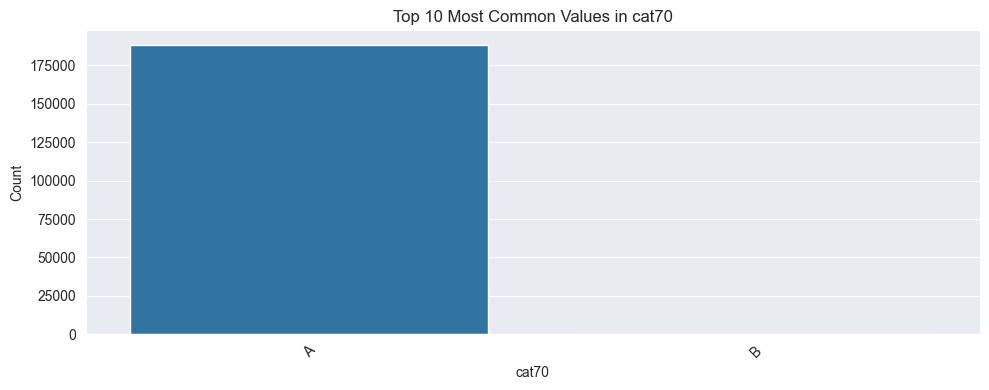

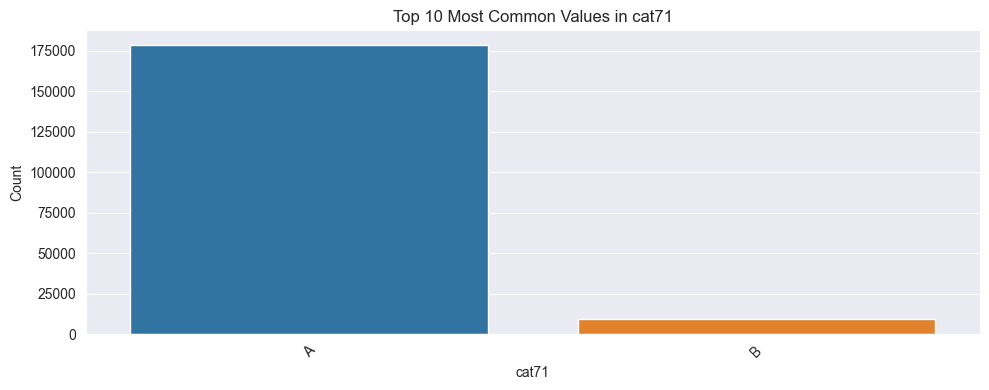

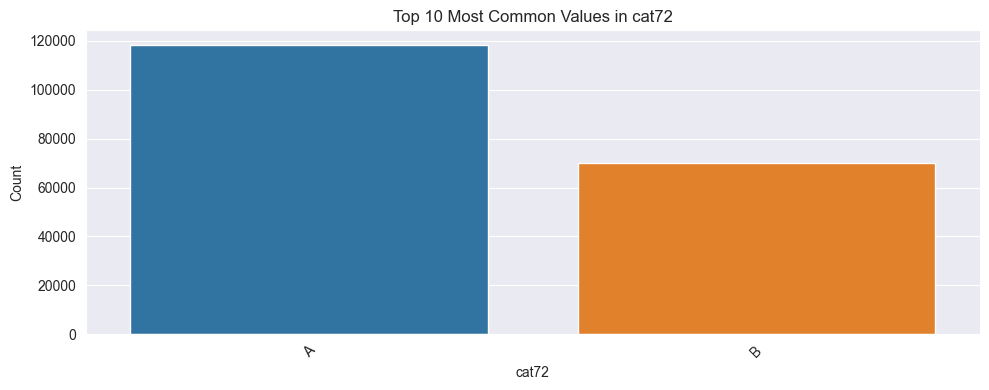

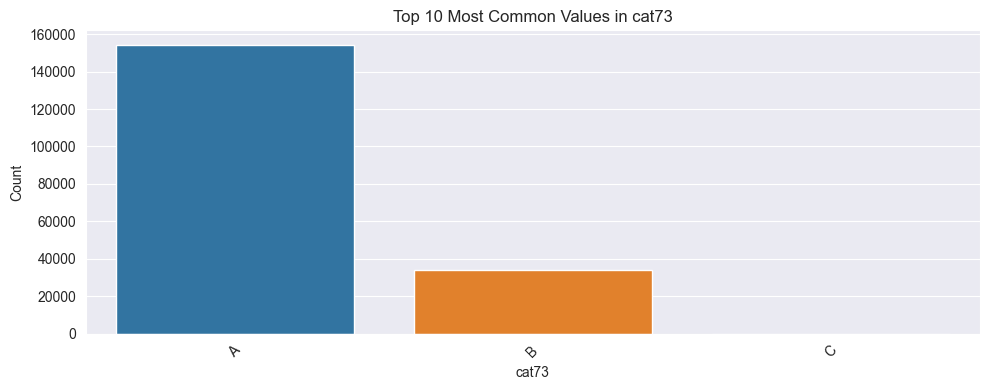

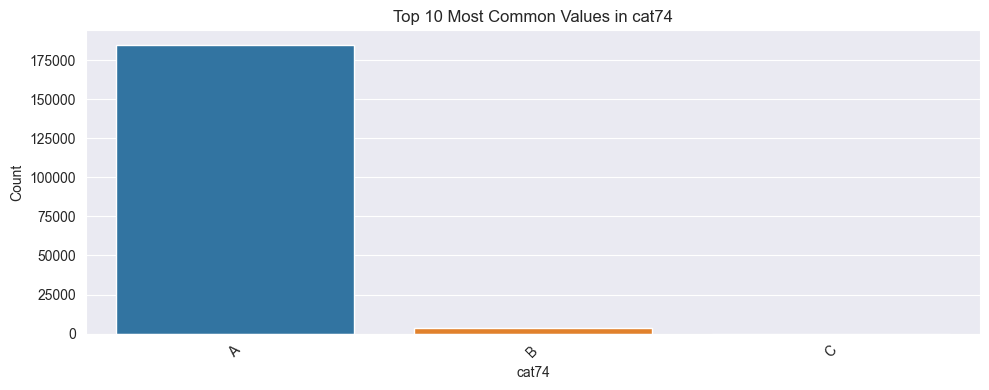

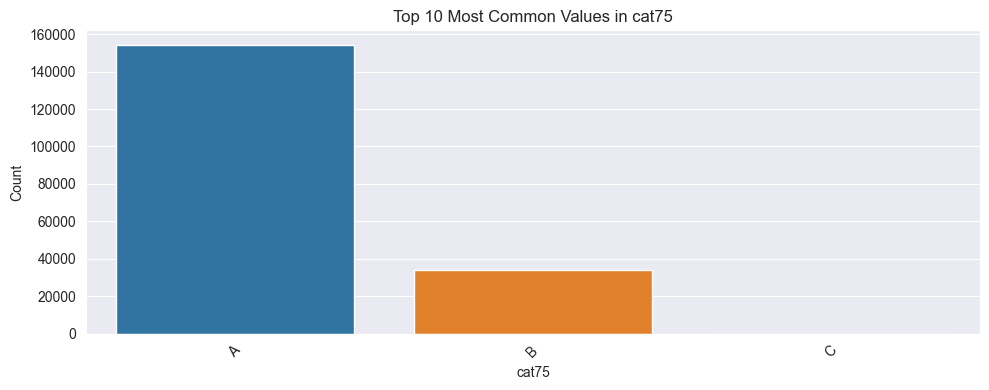

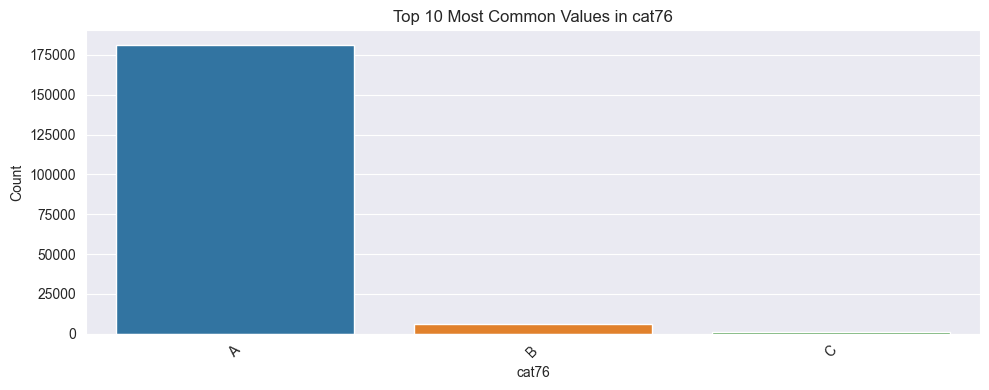

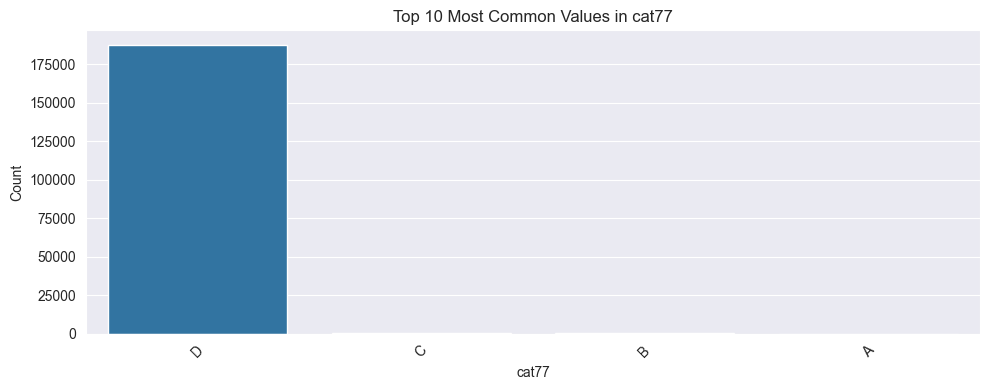

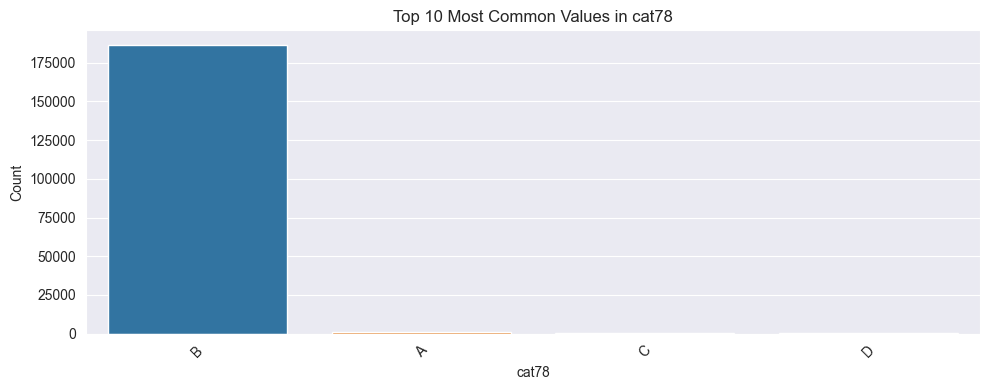

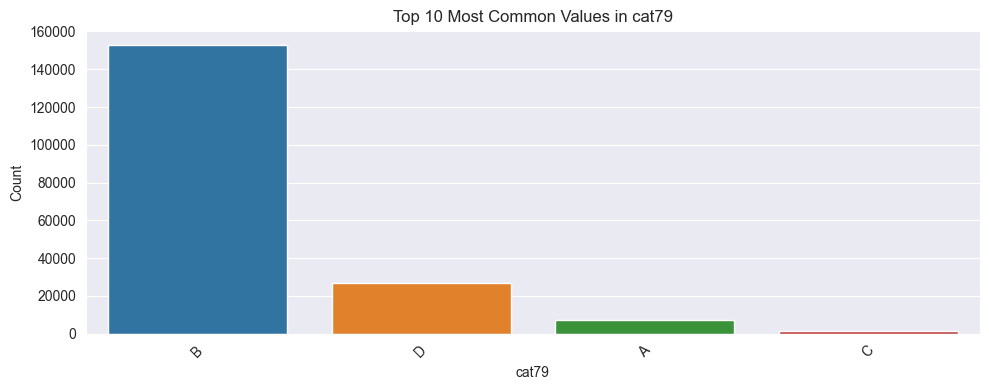

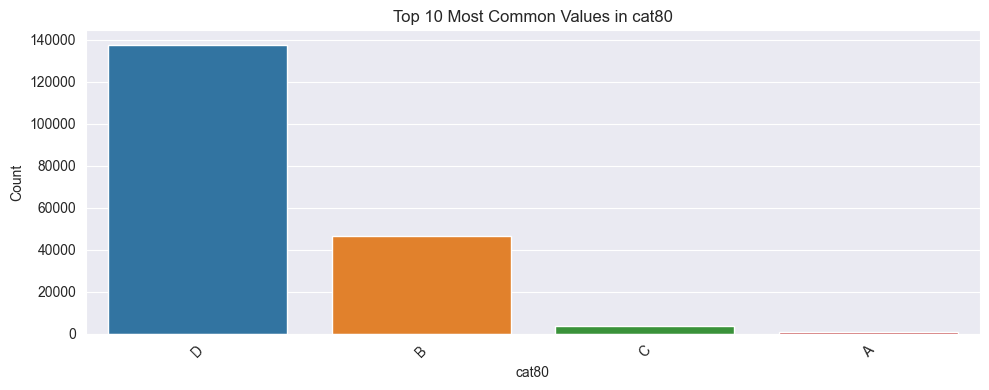

In [17]:
#Frequency Distribution
for col in cols_70_80:
    plt.figure(figsize=(10, 4))
    value_counts = df_sub[col].value_counts().head(10)  # top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


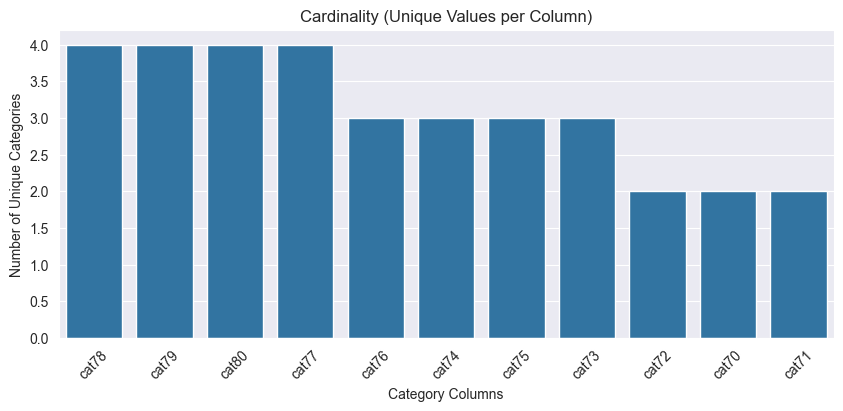

In [18]:
#Cardinality Analysis
cardinality = df_sub.nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x=cardinality.index, y=cardinality.values)
plt.title("Cardinality (Unique Values per Column)")
plt.ylabel("Number of Unique Categories")
plt.xlabel("Category Columns")
plt.xticks(rotation=45)
plt.show()

In [29]:
#Correlations Calculations
def correlation_ratio(categories, values):

    categories = np.array(categories)
    values = np.array(values)
    mean_total = np.mean(values)
    ss_between = sum([
        len(values[categories == c]) * (np.mean(values[categories == c]) - mean_total) ** 2
        for c in np.unique(categories)
    ])
    ss_total = sum((values - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total != 0 else 0

correlations = {}
for col in cols_70_80:
    correlations[col] = correlation_ratio(df_sub[col], df_sub[target_col])

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation_to_Loss'])
corr_df.sort_values(by='Correlation_to_Loss', ascending=False, inplace=True)


,Correlation_to_Loss
cat80,0.483147
cat79,0.461070
cat72,0.228227
cat73,0.155303
cat76,0.116178
cat75,0.076861
cat71,0.063721
cat78,0.061604
cat74,0.022091
cat77,0.017379


C:\Users\shemi\AppData\Local\Temp\ipykernel_33664\1236776426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_df.index, y=corr_df['Correlation_to_Loss'], palette='crest')


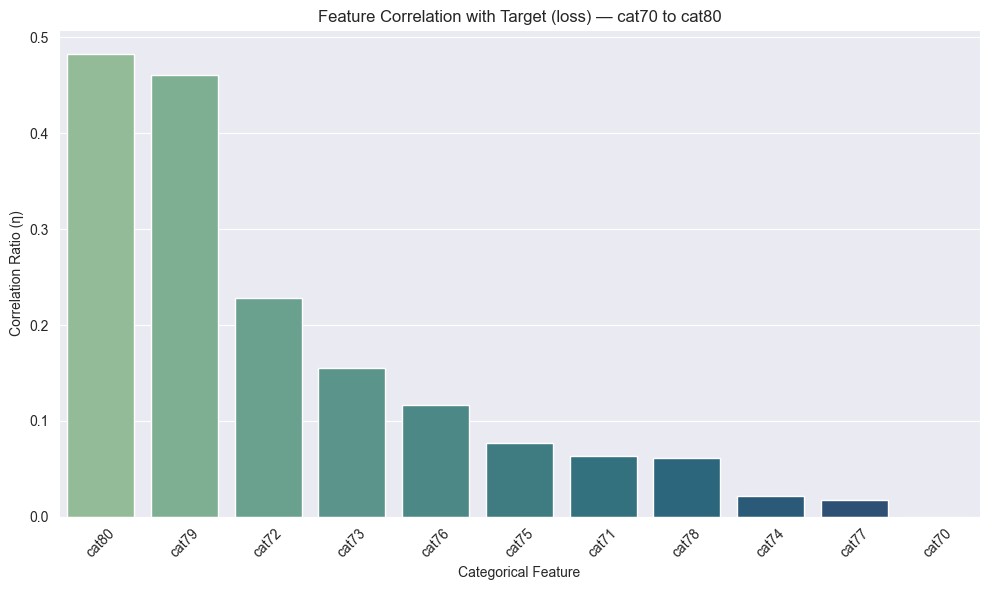

In [30]:
#Correlation display
display(corr_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index, y=corr_df['Correlation_to_Loss'], palette='crest')
plt.title("Feature Correlation with Target (loss) — cat70 to cat80")
plt.ylabel("Correlation Ratio (η)")
plt.xlabel("Categorical Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
top_feature = corr_df.index[0]
top_corr = corr_df.iloc[0, 0]
secondary = corr_df.iloc[1:3]
moderate_features = ", ".join(secondary.index.tolist())
moderate_values = ", ".join([f"{v:.3f}" for v in secondary['Correlation_to_Loss']])

average_corr = corr_df['Correlation_to_Loss'].mean()

print (f"Best feature to use is {top_feature} because it has the strongest correlation of {top_corr} to the target. Other relevant features to use are {moderate_features} with correlations of  {moderate_values} respectively. The average correlation is {average_corr:.3f}")

Best feature to use is cat80 because it has the strongest correlation of 0.48314746728791425 to the target. Other relevant features to use are cat79, cat72 with correlations of  0.461, 0.228 respectively. The average correlation is 0.153
